<a href="https://colab.research.google.com/github/BurleighCharlton/Python-Mathematics/blob/main/Prime_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prime Exploration

By Conrad Ainslie, Akshita Bafna, Burleigh Charlton, Yang, Li, Kevin Nguyen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import li
from PIL import Image # Load the package.
import math 

In [ ]:
#stuff we have 'borrowed' from marty
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= np.sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags


def where(L):
    '''
    Take a list of booleans as input and
    outputs the list of indices where True occurs.
    '''
    return [n for n in range(len(L)) if L[n]]

def primes_upto(x,primes):
  '''
  Gives primes up to x from a list of primes, primarily used as pi(x), the prime counting function.
  '''
  return len([p for p in primes if p <= x]) # List comprehension recovers the primes up to x.

In [ ]:
def sum1(x, n):
  '''
  our first sum in log int
  '''
  sum=0
  for i in range(1,n):
    term = ((-1)**(i-1) * np.log(x)**i)/(np.factorial(i)* 2**(i-1))
    sum = sum + term
  return sum

In [ ]:
gamma = 0.57721 56649 01532 

def log_int(x, n):
  '''
  takes an x and computes the log integal series rep at that point
  to degree of accuracy nK
  '''
  gamma
  + np.log(np.log(x))
  +np.sqrt(x) * 





SyntaxError: ignored

#Burleighs PIL corner

Idea 1   
using fermat test $$a^{n-1} mod (n) = 0$$
1.   init all black square
2.   check all numbers with fermat test a=2
3.   Color all that pass a=2 with a color(gonna start with red and move to more blue)
4.   Repeat with a = next prime number
5.   For each time it passes fermat test it gets an added red value
6.   see what it looks like and maybe play around with the color
7.   might make it into polar coords if that might look cool




In [ ]:
bigprimelist[0:3]

array([2, 3, 5])

In [ ]:
primelist100000 = np.asarray(where(isprime_list(100000)))
bigprimelist = np.asarray(where(isprime_list(10000000)))

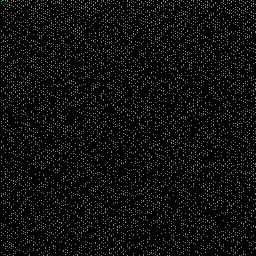

In [ ]:
primesquare = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
      if (x+(256*y) in primelist100000):
        primesquare[y,x] = [0,180,180] # Red = y, Green = 0, Blue = 1-y

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

In [ ]:
def fermat_test(n, a):
  '''
  takes a number n to test
  and the first  as a witness
  returns true if a witness n as prime
  a^n-1 mod n = 0 is evidence for primality
  '''
  if n==0:
    return np.zeros((1,a))
  results = np.zeros( (1,a) )
  index=0
  for i in primelist100000[0:a]:
    results[0,index] = (pow(int(i), n-1, n) == 1)
    index+=1
  return results


In [ ]:
print(fermat_test(5,1))
print(pow(2,4,5))

[[1.]]
1


In [ ]:
#generates an array of 10 tuples 1 by 256*256 in length
#tuples are the results of the fermat test on the first 10 primes
list_of_fermat_tests_to_10 = np.asarray([fermat_test(i,9) for i in range(0,256*256)])
print(list_of_fermat_tests_to_10[2][0,0:3])
print((list_of_fermat_tests_to_10[2])[0,3:6])
print((list_of_fermat_tests_to_10[2])[0,6:9])

[0. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [ ]:
biglist_of_fermat_tests_to_10 = np.asarray([fermat_test(i,9) for i in range(0,1024*1024)])

In [ ]:
biglist_of_fermat_tests_to_3 = np.asarray([fermat_test(i,3) for i in range(0,1024*1024)])

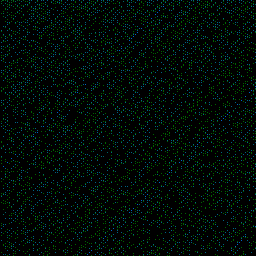

In [ ]:
##This generates a list of primes by my fermat test
primesquare = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
      if (x+(256*y) in primelist100000):
        primesquare[y,x] = [0,100,(100*np.count_nonzero(list_of_fermat_tests_to_10[y+x] ==1))] # Red = y, Green = 0, Blue = 1-y

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

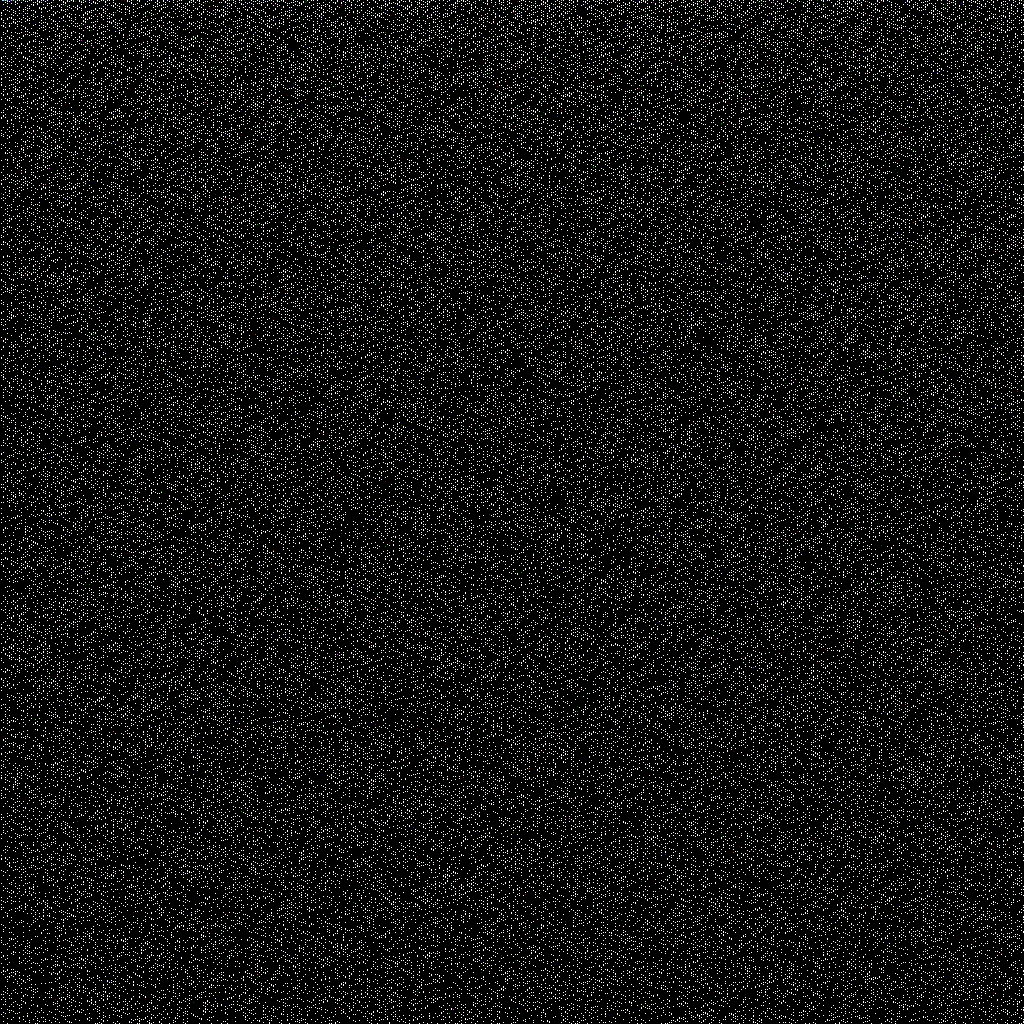

In [ ]:
##by segments of primes
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
      if (x+(1024*y) in range(1024*1024)):
        primesquare[y,x] = [83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,0:3] ==1)), #add red if witnessed by first 3 primes
                            83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,3:6] ==1)), #add green if witnessed by next three primes
                            83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,6:9] ==1))] #add blue if witnessed by next three primes

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

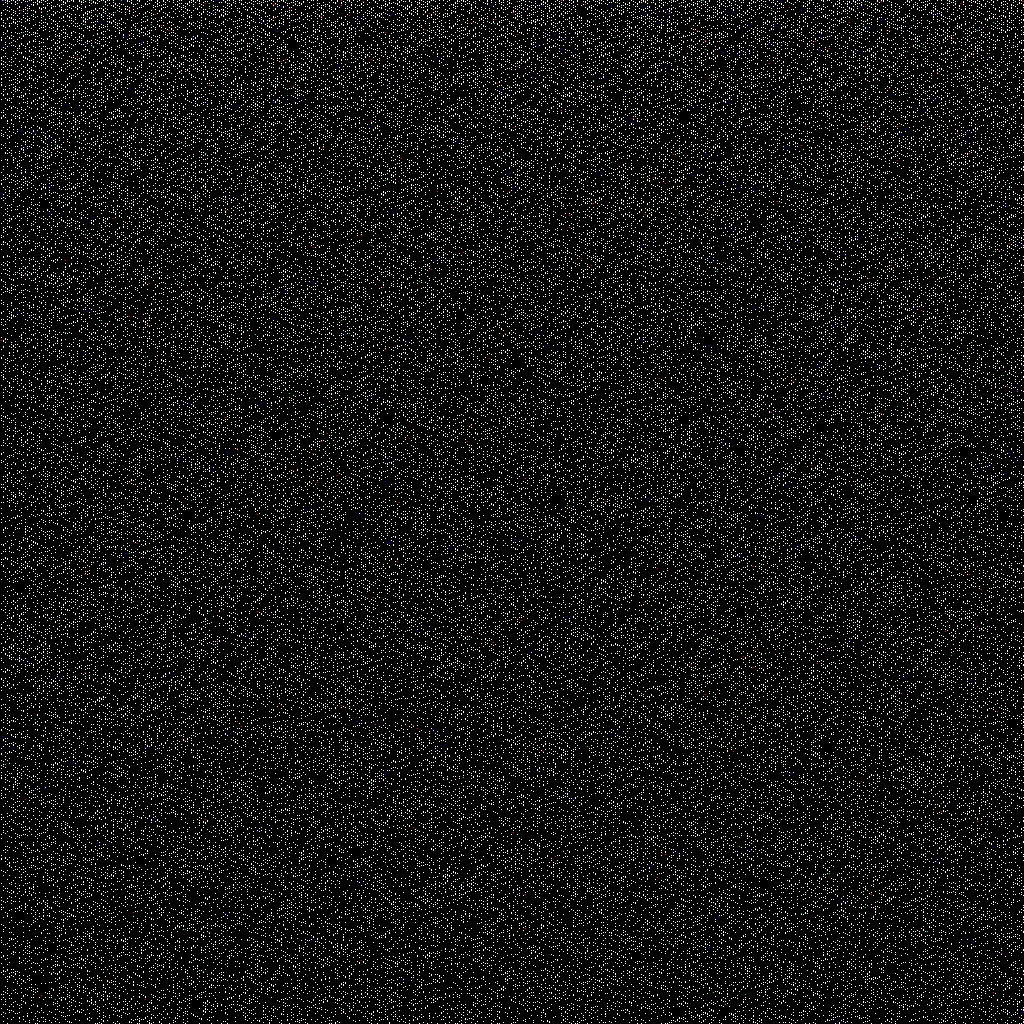

In [ ]:
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
        primesquare[y,x] = [250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,0] ==1)), #add red if witnessed by first 3 primes
                            250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,1] ==1)), #add green if witnessed by next three primes
                            250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,2] ==1))] #add blue if witnessed by next three primes

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

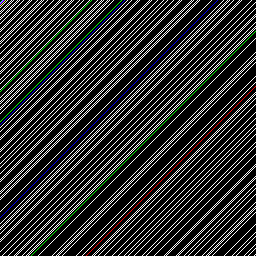

In [ ]:
##why does this look so much better when its overflowwing 256
primesquare = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
      if (x+(256*y) in range(256*256)):
        primesquare[y,x] = [250*list_of_fermat_tests_to_10[y+x][0,0], #add red if witnessed by first primes
                            250*list_of_fermat_tests_to_10[y+x][0,1], #add green if witnessed by second prime
                            250*list_of_fermat_tests_to_10[y+x][0,2]] #add blue if witnessed by third prime

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

In [ ]:
primesquaresmol = np.zeros((10, 10,3), dtype=np.uint8)
for x in range(10):
    for y in range(10):
      if (x+(10*y) in primelist100000):
        primesquaresmol[y,x] = [0,180,180] # Red = y, Green = 0, Blue = 1-y

img = Image.fromarray(primesquaresmol) # Create an image from the array.
display(img)

In [ ]:
def resize(image, width=256): 
    basewidth = width
    img = image
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    display(img)

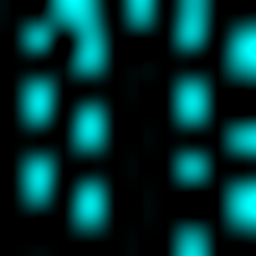

In [ ]:
resize(img)

In [ ]:
np.zeros((10, 10), dtype=np.uint8)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
256/3

85.33333333333333

# Conrad's stuff


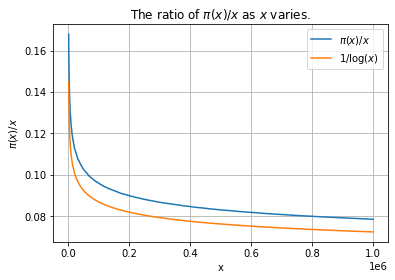

In [ ]:
x_values = np.linspace(0,1000000,1001) # The numpy array [0,1000,2000,3000,...,1000000]
primelist1000000 = (where(isprime_list(1000000)))
pix_values = np.array([primes_upto(x,primelist1000000) for x in x_values])  # [FUNCTION(x) for x in LIST] syntax
m_values = pix_values[1:] / x_values[1:]
plt.plot(x_values[1:], m_values, label='$\pi(x)/x$')  # The same as the plot above.
plt.plot(x_values[1:], 1 / np.log(x_values[1:]), label='$1 / \log(x)$')  # Overlay the graph of 1 / log(x)
plt.title('The ratio of $\pi(x) / x$ as $x$ varies.')
plt.xlabel('x')
plt.ylabel('$\pi(x) / x$')
plt.grid(True)
plt.legend()  # Turn on the legend.
plt.show()